In [19]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

In [2]:
load_boston()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
import pandas as pd
import numpy as np


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [4]:
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22)

In [5]:
# np.hstack([raw_df.loc[::2, :], raw_df.loc[1::2, :2]])

In [6]:
# target = raw_df.loc[1::2, 2]
# target

In [7]:
# a = np.zeros((3,4))
# b = np.ones((3,3))

# np.hstack((a,b)).shape

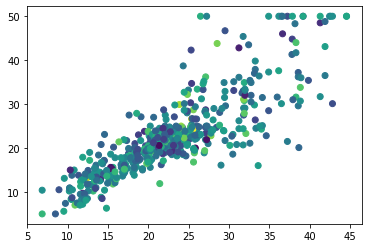

In [8]:
model = KNeighborsRegressor()
model.fit(X, y)

preds = model.predict(X)

plt.scatter(preds, y, c=np.array(np.random.randn((506))))

In [9]:
pipe = Pipeline(steps=[
    ("scale",StandardScaler()),
    ("model",KNeighborsRegressor())
])

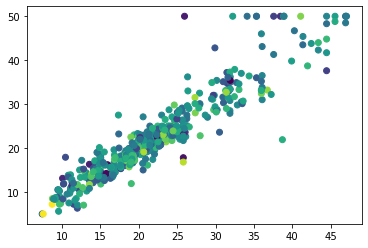

In [10]:
pipe.fit(X, y)
preds = pipe.predict(X)
plt.scatter(preds, y, c=np.array(np.random.randn((506))))

In [11]:
# from sklearn.metrics import accuracy_score

# accuracy_score(y, preds)

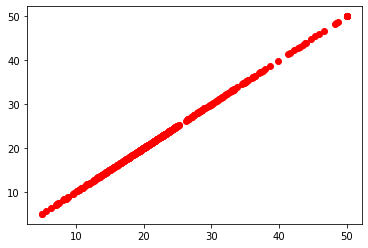

In [12]:
#model falsely predicting all correct by changing n_neighbors to 1 because we are predicting from training data
pipe = Pipeline(steps=[
    ("scale",StandardScaler()),
    ("model",KNeighborsRegressor(n_neighbors=1))
])

pipe.fit(X, y)
preds = pipe.predict(X)
plt.scatter(preds, y, c="r")

In [17]:
pipe = Pipeline(steps=[
    ("scale",StandardScaler()),
    ("model",KNeighborsRegressor(n_neighbors=1))
])

In [18]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [20]:
[i for i in range(1,11)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [27]:
mod = GridSearchCV(estimator=pipe,
            param_grid={'model__n_neighbors':[i for i in range(1,11)]},
             cv=3
            )

In [29]:
mod.fit(X, y)
mod.cv_results_

{'mean_fit_time': array([0.00200073, 0.00163539, 0.00200025, 0.00166631, 0.00200899,
        0.00166718, 0.00200001, 0.00200184, 0.00133896, 0.00201138]),
 'std_fit_time': array([1.40826266e-06, 4.87188686e-04, 8.10467325e-07, 4.71201776e-04,
        1.29250335e-05, 4.71482786e-04, 1.12391596e-07, 2.30608275e-06,
        4.71876126e-04, 1.40138395e-05]),
 'mean_score_time': array([0.0030001 , 0.00268928, 0.00199906, 0.00233332, 0.00232426,
        0.00299946, 0.00233245, 0.00266639, 0.0029974 , 0.00265567]),
 'std_score_time': array([8.17216105e-04, 4.44013893e-04, 5.61957980e-07, 4.71089385e-04,
        4.77779940e-04, 2.24783192e-07, 4.71707689e-04, 4.71314168e-04,
        2.54561383e-06, 4.58542519e-04]),
 'param_model__n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'model__n_neighbors': 1},


In [31]:
df = pd.DataFrame(mod.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002001,1.408263e-06,0.003000,8.172161e-04,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001635,4.871887e-04,0.002689,4.440139e-04,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.002000,8.104673e-07,0.001999,5.619580e-07,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001666,4.712018e-04,0.002333,4.710894e-04,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.002009,1.292503e-05,0.002324,4.777799e-04,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.001667,4.714828e-04,0.002999,2.247832e-07,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.002000,1.123916e-07,0.002332,4.717077e-04,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.002002,2.306083e-06,0.002666,4.713142e-04,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.001339,4.718761e-04,0.002997,2.545614e-06,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.002011,1.401384e-05,0.002656,4.585425e-04,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4
